## Analyse "surface" bei anderen Städten

Uns interessiert im Zusammenhang zum Berliner Datensatz: 

* Ähneln sich die Daten, gibt es Gemeinsamkeiten?
* Ist unser Vorgehen evtl. auch auf andere Städte Deutschlands anwendbar?

Folgende Städte werden untersucht:
* **Hamburg**
* **Stuttgart**
* **Bremen**

  
Da in OSM einzelne Städte auch zu Ballungsräumen zuammengefasst werden, z.B. Stuttgart, und deshalb auch ländliche Gegenden mit anderer "Straßenstruktur" einbezogen werden, variieren die surface-Werte im Vergleich zu Berlin teilweise.

Unsere Idee des festen Setzens unser festgelegten Werte für nicht eingetragene surface-Werte ist nicht genau auf andere Städte übertragbar.  
Die Städte und Ballungsräume müssen jeweils einzeln analysiert werden.




In [3]:
# Daten wurden schon geladen und sind im Ordner data abgelegt
import os
import pyrosm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='pyrosm')

# Korrigierter Verzeichnis-Pfad
directory = "../../data"
file_path = os.path.join(directory, "berlin-latest.osm.pbf")

# OSM-Objekt erstellen
berlin_osm = pyrosm.OSM(file_path)

# Fahrradnetzwerk extrahieren
cycle_net_berlin = berlin_osm.get_network(network_type="cycling")

highway
service          92.192428
path              2.592268
track             1.804588
residential       1.239981
footway           0.981523
cycleway          0.655375
living_street     0.310764
bridleway         0.058461
unclassified      0.033846
tertiary          0.027692
steps             0.020000
elevator          0.016923
construction      0.015384
pedestrian        0.015384
primary           0.009231
secondary         0.007692
street_lamp       0.006154
tertiary_link     0.003077
busway            0.003077
road              0.001538
services          0.001538
rest_area         0.001538
bus_stop          0.001538
Name: proportion, dtype: float64


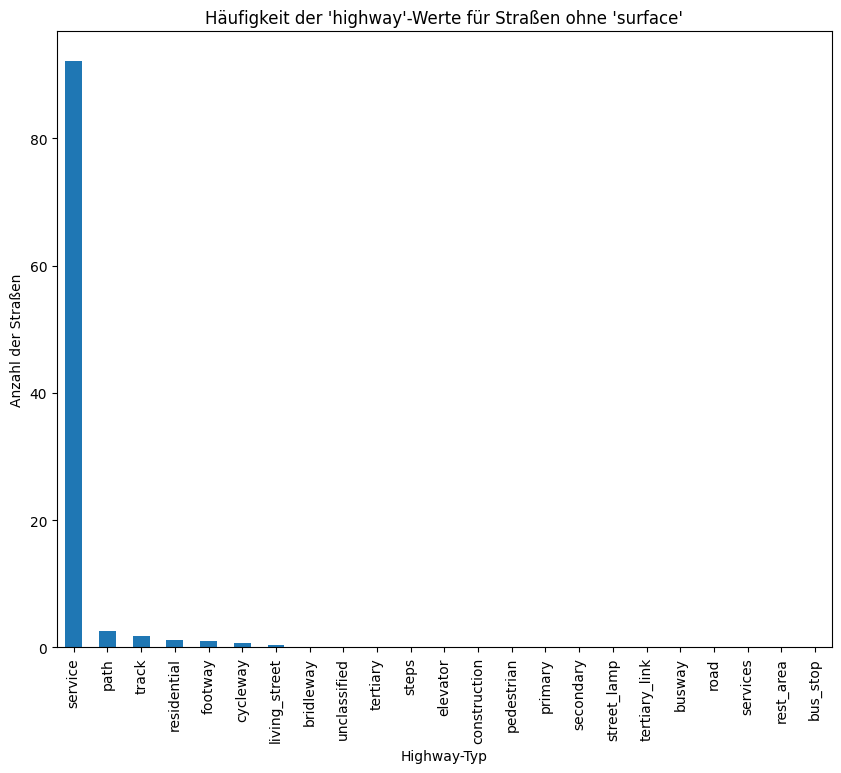

In [6]:
import matplotlib.pyplot as plt
# Filter für Wege ohne Daten in der Spalte "surface"
cycle_net_no_surface = cycle_net_berlin[cycle_net_berlin["surface"].isna()]

# Häufigkeitstabelle für die Werte in der Spalte "highway"
highway_counts = cycle_net_no_surface["highway"].value_counts(normalize=True)*100

# Ausgabe der Häufigkeitstabelle
print(highway_counts)

# Visualisierung der Häufigkeitstabelle als Balkendiagramm
plt.figure(figsize=(10, 8))
highway_counts.plot(kind='bar')
plt.title("Häufigkeit der 'highway'-Werte für Straßen ohne 'surface'")
plt.xlabel("Highway-Typ")
plt.ylabel("Anzahl der Straßen")
plt.show()

#### seltene Straßentypen Berlin

In [16]:
# Extrahieren der relevanten Spalten 
highways_berlin = cycle_net_berlin[['geometry', 'highway']]

In [17]:
# verschiedene Straßentypen und deren Häufigkeit im Netzwerk
highway_counts_berlin = highways_berlin['highway'].value_counts(normalize=True)*100

# Schwelle für seltene Straßentypen (< 1%)
threshold = 1

# Identifizieren von seltenen Straßentypen im gesamten Datensatz
rare_highways_berlin = highway_counts_berlin[highway_counts_berlin < threshold].index
print(f"Seltene Straßentypen im gesamten Datensatz (unter {threshold}%):")
print(rare_highways_berlin)

Seltene Straßentypen im gesamten Datensatz (unter 1%):
Index(['unclassified', 'pedestrian', 'secondary_link', 'bridleway',
       'primary_link', 'steps', 'construction', 'tertiary_link', 'trunk',
       'busway', 'elevator', 'street_lamp', 'road', 'proposed', 'services',
       'rest_area', 'bus_stop'],
      dtype='object', name='highway')


# TEST HAMBURG

In [7]:
import certifi
import ssl
import urllib.request
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='pyrosm')

# SSL-Kontext erstellen, der certifi verwendet
ssl_context = ssl.create_default_context(cafile=certifi.where())
import requests

import pyrosm
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt


# URL der PBF-Datei für Berlin
url = "https://download.geofabrik.de/europe/germany/hamburg-latest.osm.pbf"
# Verzeichnis, in das die Datei heruntergeladen wird
directory = "../../data"
# Dateipfad
file_path = os.path.join(directory, "hamburg-latest.osm.pbf")

# Verzeichnis erstellen, falls nicht vorhanden
os.makedirs(directory, exist_ok=True)

# Datei herunterladen
response = requests.get(url, stream=True)
response.raise_for_status()  # Fehler bei nicht erfolgreichem Statuscode

# Datei speichern
with open(file_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

# OSM-Objekt erstellen
hamburg_osm = pyrosm.OSM(file_path)

In [12]:
# Fahrradnetzwerk extrahieren
cycle_net_hamburg = hamburg_osm.get_network(network_type="cycling")

highway
service           77.475927
path              10.265429
track              3.861697
residential        3.080876
footway            3.003542
living_street      0.730929
cycleway           0.451529
unclassified       0.429077
bridleway          0.157162
trunk              0.129721
tertiary           0.094796
pedestrian         0.077334
steps              0.062366
secondary          0.057377
trunk_link         0.049893
services           0.017462
construction       0.014968
proposed           0.009979
primary            0.009979
bus_stop           0.009979
secondary_link     0.007484
road               0.002495
Name: proportion, dtype: float64


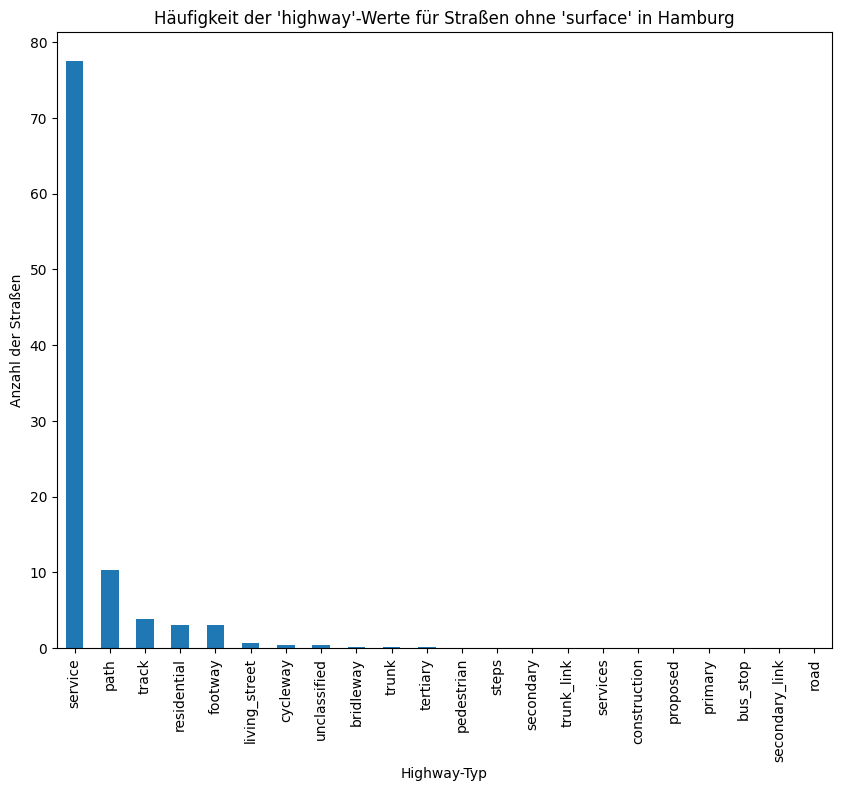

In [9]:
# Filter für Wege ohne Daten in der Spalte "surface"
cycle_net_no_surface_hamburg = cycle_net_hamburg[cycle_net_hamburg["surface"].isna()]

# Häufigkeitstabelle für die Werte in der Spalte "highway"
highway_counts_h = cycle_net_no_surface_hamburg["highway"].value_counts(normalize=True)*100

# Ausgabe der Häufigkeitstabelle
print(highway_counts_h)

# Visualisierung der Häufigkeitstabelle als Balkendiagramm
plt.figure(figsize=(10, 8))
highway_counts_h.plot(kind='bar')
plt.title("Häufigkeit der 'highway'-Werte für Straßen ohne 'surface' in Hamburg")
plt.xlabel("Highway-Typ")
plt.ylabel("Anzahl der Straßen")
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_streets_h = cycle_net_hamburg[cycle_net_hamburg["highway"] == "service"]


# Ersetzen von NaN durch "No Data"
surface_counts_h = service_streets_h['surface'].value_counts(normalize=True)*100


print(surface_counts_h)

surface
paving_stones         47.199879
asphalt               34.094108
sett                   6.007440
concrete               3.423487
compacted              2.176754
paved                  2.015886
cobblestone            1.623768
grass_paver            0.723909
unpaved                0.678665
gravel                 0.361955
concrete:plates        0.346873
fine_gravel            0.256384
ground                 0.191032
unhewn_cobblestone     0.186004
concrete:lanes         0.180977
dirt                   0.165896
grass                  0.165896
pebblestone            0.075407
sand                   0.050271
wood                   0.025136
metal                  0.015081
artificial_turf        0.015081
metal_grid             0.010054
gate                   0.005027
rock                   0.005027
Name: proportion, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_paths_h = cycle_net_hamburg[cycle_net_hamburg["highway"] == "path"]


# Ersetzen von NaN durch "No Data"
surface_counts_h = service_paths_h['surface'].value_counts(normalize=True)*100


print(surface_counts_h)

surface
paving_stones         34.381708
compacted             16.658889
asphalt               12.263182
ground                10.881941
dirt                   6.784881
grass                  4.078395
unpaved                2.090527
paved                  1.819879
sand                   1.670555
fine_gravel            1.614559
sett                   1.353243
earth                  1.250583
gravel                 1.129258
wood                   1.054596
concrete               0.979935
pebblestone            0.438637
woodchips              0.363976
metal                  0.345310
concrete:plates        0.233318
grass_paver            0.130658
cobblestone            0.111993
mud                    0.093327
metal_grid             0.074662
rock                   0.074662
concrete:lanes         0.037331
stepping_stones        0.027998
plastic                0.018665
unhewn_cobblestone     0.018665
blocks                 0.009333
tartan                 0.009333
Name: proportion, dtype: float64

### Verteilung highway types - Prüfung seltener Straßen in Hamburg

In [15]:
# verschiedene Straßentypen und deren Häufigkeit im Netzwerk
highway_counts = cycle_net_hamburg['highway'].value_counts(normalize=True)*100
print(highway_counts)

# Schwelle für seltene Straßentypen (< 1%)
threshold = 1

# Identifizieren von seltenen Straßentypen im gesamten Datensatz
rare_highways = highway_counts[highway_counts < threshold].index
print(f"Seltene Straßentypen im gesamten Datensatz (unter {threshold}%):")
print(rare_highways)



highway
service           43.785289
residential       13.304286
path              12.744820
footway            7.686424
secondary          5.132304
tertiary           4.218767
primary            3.449609
track              3.274293
unclassified       2.676154
living_street      1.106041
cycleway           1.031273
pedestrian         0.503605
secondary_link     0.234615
trunk              0.196801
trunk_link         0.188207
tertiary_link      0.124612
primary_link       0.109143
bridleway          0.108284
steps              0.062736
construction       0.046407
services           0.006016
proposed           0.003438
bus_stop           0.003438
road               0.001719
motorway_link      0.000859
foodpath           0.000859
Name: proportion, dtype: float64
Seltene Straßentypen im gesamten Datensatz (unter 1%):
Index(['pedestrian', 'secondary_link', 'trunk', 'trunk_link', 'tertiary_link',
       'primary_link', 'bridleway', 'steps', 'construction', 'services',
       'proposed', 'bus_

### Überprüfung der Übereinstimmungen der rare_highways Berlins und Hamburgs

In [23]:
number_rare_highways_berlin = len(rare_highways_berlin)
print(f"Anzahl der seltenen Straßentypen in Berlin: {number_rare_highways_berlin}")

number_rare_highways = len(rare_highways)
print(f"Anzahl der seltenen Straßentypen in Hamburg: {number_rare_highways}")

# Schritt 6: Vergleich der seltenen Straßentypen in beiden Datensätzen
common_rare_highways = set(rare_highways).intersection(set(rare_highways_berlin))
print(f"Gemeinsame seltene Straßentypen in beiden Datensätzen:")
print(common_rare_highways)

# Schritt 7: Anzahl der gemeinsamen seltenen Straßentypen
num_common_rare_highways = len(common_rare_highways)
print(f"Anzahl der gemeinsamen seltenen Straßentypen: {num_common_rare_highways}")


Anzahl der seltenen Straßentypen in Berlin: 17
Anzahl der seltenen Straßentypen in Hamburg: 15
Gemeinsame seltene Straßentypen in beiden Datensätzen:
{'secondary_link', 'bridleway', 'construction', 'steps', 'services', 'trunk', 'bus_stop', 'road', 'tertiary_link', 'pedestrian', 'proposed', 'primary_link'}
Anzahl der gemeinsamen seltenen Straßentypen: 12


**-> In Berlin gibt es mehr Straßentypen , die in der Verteilung bei unter 1% liegen als in Hamburg.**  
**Die seltenen Straßentypen beider Städte gleichen sich nur teilweise**

# TEST STUTTGART

In [24]:
import os
import pyrosm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='pyrosm')

# Korrigierter Verzeichnis-Pfad
directory = "../../data"
file_path = os.path.join(directory, "stuttgart-regbez-latest.osm.pbf")

# OSM-Objekt erstellen
stuttgart_osm = pyrosm.OSM(file_path)

# Fahrradnetzwerk extrahieren
cycle_net_stutt = stuttgart_osm.get_network(network_type="cycling")



highway
track              37.933225
service            36.945857
residential        12.249576
path                6.648507
unclassified        1.957819
tertiary            1.301530
footway             0.972868
secondary           0.766764
living_street       0.510946
cycleway            0.169510
primary             0.126701
pedestrian          0.109439
trunk_link          0.104951
trunk               0.052821
bus_stop            0.031761
rest_area           0.026583
steps               0.020024
primary_link        0.016226
secondary_link      0.014845
bridleway           0.011047
services            0.008631
tertiary_link       0.007595
emergency_bay       0.003798
busway              0.002417
razed               0.001381
planned             0.000690
passing_place       0.000690
platform            0.000690
construction        0.000690
road                0.000345
escape              0.000345
raceway             0.000345
abandoned           0.000345
crossing            0.000345
ladder

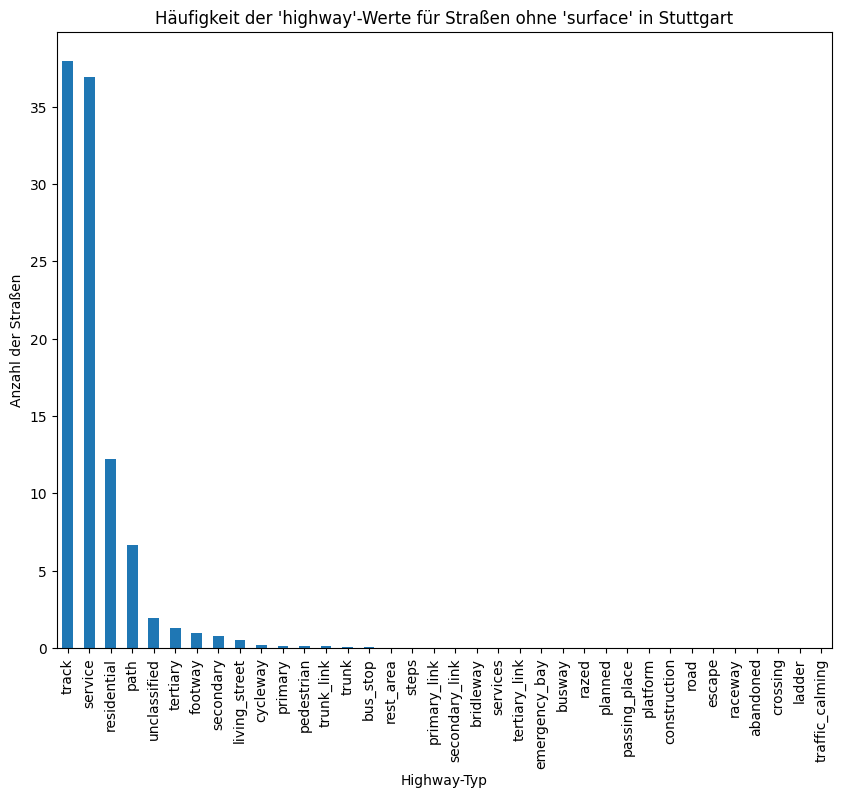

In [49]:
# Filter für Wege ohne Daten in der Spalte "surface"
cycle_net_no_surface_stutt = cycle_net_stutt[cycle_net_stutt["surface"].isna()]

# Häufigkeitstabelle für die Werte in der Spalte "highway"
highway_counts_st = cycle_net_no_surface_stutt["highway"].value_counts(normalize=True)*100

# Ausgabe der Häufigkeitstabelle
print(highway_counts_st)

# Visualisierung der Häufigkeitstabelle als Balkendiagramm
plt.figure(figsize=(10, 8))
highway_counts_st.plot(kind='bar')
plt.title("Häufigkeit der 'highway'-Werte für Straßen ohne 'surface' in Stuttgart")
plt.xlabel("Highway-Typ")
plt.ylabel("Anzahl der Straßen")
plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_streets_st = cycle_net_stutt[cycle_net_stutt["highway"] == "service"]


# Ersetzen von NaN durch "No Data"
surface_counts_st = service_streets_st['surface'].value_counts(normalize=True)*100


print(surface_counts_st)

surface
asphalt                  72.824953
paving_stones             9.781950
paved                     6.895632
gravel                    3.373839
concrete                  1.469839
fine_gravel               1.142400
sett                      1.079337
compacted                 0.797982
unpaved                   0.584540
cobblestone               0.499648
grass_paver               0.419608
grass                     0.375949
pebblestone               0.269228
ground                    0.147954
concrete:plates           0.145529
dirt                      0.084892
wood                      0.024255
unhewn_cobblestone        0.016978
cobblestone:flattened     0.014553
concrete:lanes            0.012127
sand                      0.009702
mud                       0.009702
metal                     0.007276
aspalt                    0.004851
clay                      0.002425
gridstones                0.002425
paving_stones:30          0.002425
Name: proportion, dtype: float64


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_streets_st = cycle_net_stutt[cycle_net_stutt["highway"] == "track"]


# Ersetzen von NaN durch "No Data"
surface_counts_st = service_streets_st['surface'].value_counts(normalize=True)*100


print(surface_counts_st)

surface
asphalt                      30.648704
gravel                       20.111343
grass                        18.134569
ground                        8.062587
paved                         5.249652
                               ...    
dirt;paved                    0.001087
paving_stones:lanes;grass     0.001087
grab                          0.001087
chippings                     0.001087
Waldboden                     0.001087
Name: proportion, Length: 76, dtype: float64


In [61]:
# import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_streets_st = cycle_net_stutt[cycle_net_stutt["highway"] == "residential"]


# Ersetzen von NaN durch "No Data"
surface_counts_st = service_streets_st['surface'].value_counts(normalize=True)*100


print(surface_counts_st)

surface
asphalt                  90.929393
paved                     6.596661
paving_stones             1.192626
sett                      0.617695
concrete                  0.205898
cobblestone               0.156799
gravel                    0.118787
unpaved                   0.050683
compacted                 0.034844
fine_gravel               0.033260
pebblestone               0.017422
concrete:plates           0.014254
grass                     0.006335
grass_paver               0.006335
wood                      0.006335
dirt                      0.004751
ground                    0.003168
paving_stones:30          0.001584
cobblestone:flattened     0.001584
pflastersteine            0.001584
Name: proportion, dtype: float64


In [62]:
# import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_streets_st = cycle_net_stutt[cycle_net_stutt["highway"] == "path"]


# Ersetzen von NaN durch "No Data"
surface_counts_st = service_streets_st['surface'].value_counts(normalize=True)*100


print(surface_counts_st)

surface
asphalt                   33.563224
ground                    17.900386
paving_stones             11.008841
grass                      9.774690
paved                      6.385958
dirt                       6.214836
gravel                     2.750914
fine_gravel                2.621276
unpaved                    2.232363
compacted                  1.752703
sett                       1.568617
wood                       0.954134
concrete                   0.853017
earth                      0.580777
pebblestone                0.464103
cobblestone                0.292981
grass_paver                0.186678
concrete:plates            0.158158
woodchips                  0.152973
metal                      0.142602
mud                        0.114081
sand                       0.090746
rock                       0.041484
grass;ground               0.028520
stepping_stones            0.023335
unhewn_cobblestone         0.023335
stone                      0.020742
ground;grass        

### Verteilung highway types - Prüfung seltener Straßen in Hamburg

In [25]:
# verschiedene Straßentypen und deren Häufigkeit im Netzwerk
highway_counts_stutt = cycle_net_stutt['highway'].value_counts(normalize=True)*100
print(highway_counts_stutt)

# Schwelle für seltene Straßentypen (< 1%)
threshold = 1

# Identifizieren von seltenen Straßentypen im gesamten Datensatz
rare_highways_stutt = highway_counts_stutt[highway_counts_stutt < threshold].index
print(f"Seltene Straßentypen im gesamten Datensatz Stuttgart (unter {threshold}%):")
print(rare_highways)


highway
track              33.719512
service            24.765453
residential        16.475109
path                9.660374
secondary           3.880388
tertiary            3.522051
unclassified        2.443368
footway             1.891413
primary             1.174240
living_street       0.900601
pedestrian          0.343802
cycleway            0.341463
trunk               0.256933
trunk_link          0.201804
primary_link        0.140829
secondary_link      0.130638
tertiary_link       0.068994
steps               0.029736
bus_stop            0.018042
rest_area           0.013030
bridleway           0.007852
services            0.004176
emergency_bay       0.002172
construction        0.002005
busway              0.001336
raceway             0.000835
razed               0.000835
traffic_calming     0.000668
planned             0.000501
escape              0.000334
passing_place       0.000334
platform            0.000334
road                0.000167
disused             0.000167
abando

### Überprüfung der Übereinstimmungen der rare_highways Berlins und Stuttgarts

In [26]:
number_rare_highways_berlin = len(rare_highways_berlin)
print(f"Anzahl der seltenen Straßentypen in Berlin: {number_rare_highways_berlin}")

number_rare_highways_stutt = len(rare_highways_stutt)
print(f"Anzahl der seltenen Straßentypen in Stuttgart: {number_rare_highways_stutt}")

# Schritt 6: Vergleich der seltenen Straßentypen in beiden Datensätzen
common_rare_highways = set(rare_highways_stutt).intersection(set(rare_highways_berlin))
print(f"Gemeinsame seltene Straßentypen in beiden Datensätzen:")
print(common_rare_highways)

# Schritt 7: Anzahl der gemeinsamen seltenen Straßentypen
num_common_rare_highways = len(common_rare_highways)
print(f"Anzahl der gemeinsamen seltenen Straßentypen: {num_common_rare_highways}")

Anzahl der seltenen Straßentypen in Berlin: 17
Anzahl der seltenen Straßentypen in Stuttgart: 28
Gemeinsame seltene Straßentypen in beiden Datensätzen:
{'rest_area', 'secondary_link', 'bridleway', 'construction', 'steps', 'busway', 'services', 'trunk', 'bus_stop', 'road', 'tertiary_link', 'pedestrian', 'primary_link'}
Anzahl der gemeinsamen seltenen Straßentypen: 13


**-> Stuttgart hat deutlich mehr seltene Straßentypen als Berlin**   


# TEST BREMEN

In [27]:
import certifi
import ssl
import urllib.request
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='pyrosm')

# SSL-Kontext erstellen, der certifi verwendet
ssl_context = ssl.create_default_context(cafile=certifi.where())
import requests

import pyrosm
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt


# URL der PBF-Datei für Berlin
url = "https://download.geofabrik.de/europe/germany/bremen-latest.osm.pbf"
# Verzeichnis, in das die Datei heruntergeladen wird
directory = "../../data"
# Dateipfad
file_path = os.path.join(directory, "bremen-latest.osm.pbf")

# Verzeichnis erstellen, falls nicht vorhanden
os.makedirs(directory, exist_ok=True)

# Datei herunterladen
response = requests.get(url, stream=True)
response.raise_for_status()  # Fehler bei nicht erfolgreichem Statuscode

# Datei speichern
with open(file_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

# OSM-Objekt erstellen
bremen_osm = pyrosm.OSM(file_path)

In [28]:
# Fahrradnetzwerk extrahieren
cycle_net_bremen = bremen_osm.get_network(network_type="cycling")

highway
service           66.214718
path              16.679458
track              6.404025
footway            3.044257
residential        3.001620
cycleway           1.645775
living_street      0.916688
unclassified       0.733350
tertiary           0.341093
pedestrian         0.332566
trunk              0.243029
secondary          0.149228
trunk_link         0.127910
rest_area          0.029846
primary            0.029846
steps              0.029846
bridleway          0.021318
platform           0.017055
primary_link       0.012791
proposed           0.008527
services           0.004264
construction       0.004264
tertiary_link      0.004264
secondary_link     0.004264
Name: proportion, dtype: float64


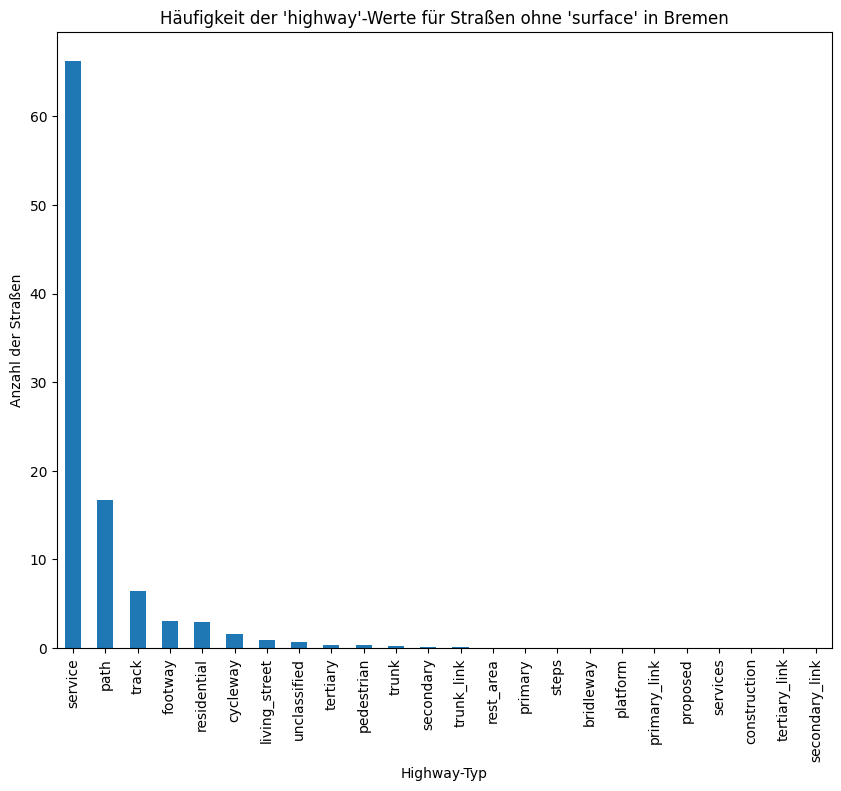

In [54]:
# Filter für Wege ohne Daten in der Spalte "surface"
cycle_net_no_surface_bremen = cycle_net_bremen[cycle_net_bremen["surface"].isna()]

# Häufigkeitstabelle für die Werte in der Spalte "highway"
highway_counts_br = cycle_net_no_surface_bremen["highway"].value_counts(normalize=True)*100

# Ausgabe der Häufigkeitstabelle
print(highway_counts_br)

# Visualisierung der Häufigkeitstabelle als Balkendiagramm
plt.figure(figsize=(10, 8))
highway_counts_br.plot(kind='bar')
plt.title("Häufigkeit der 'highway'-Werte für Straßen ohne 'surface' in Bremen")
plt.xlabel("Highway-Typ")
plt.ylabel("Anzahl der Straßen")
plt.show()

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_streets_br = cycle_net_bremen[cycle_net_bremen["highway"] == "service"]


# Ersetzen von NaN durch "No Data"
surface_counts_br = service_streets_br['surface'].value_counts(normalize=True)*100


print(surface_counts_br)

surface
paving_stones              47.955272
asphalt                    29.424920
sett                        6.277955
paved                       4.169329
gravel                      2.811502
concrete                    2.444089
compacted                   1.709265
unpaved                     1.565495
fine_gravel                 0.894569
cobblestone                 0.479233
grass_paver                 0.447284
ground                      0.367412
pebblestone                 0.319489
concrete:plates             0.271565
grass                       0.239617
concrete:lanes              0.191693
unhewn_cobblestone          0.111821
dirt                        0.111821
wood                        0.063898
sand                        0.047923
metal                       0.015974
compacted;paving_stones     0.015974
metal_grid                  0.015974
cobblestone:flattened       0.015974
rock                        0.015974
paving_stones:lanes         0.015974
Name: proportion, dtype: float

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_streets_br = cycle_net_bremen[cycle_net_bremen["highway"] == "path"]


# Ersetzen von NaN durch "No Data"
surface_counts_br = service_streets_br['surface'].value_counts(normalize=True)*100


print(surface_counts_br)

surface
paving_stones              54.258177
asphalt                    11.834413
compacted                   7.536736
ground                      4.613683
fine_gravel                 3.697267
paved                       3.634065
grass                       2.607047
concrete                    2.101438
dirt                        1.959235
gravel                      1.753832
sett                        1.422026
unpaved                     1.343024
wood                        0.995418
pebblestone                 0.489809
concrete:plates             0.379207
sand                        0.379207
metal                       0.316006
earth                       0.300205
mud                         0.079001
compacted;paving_stones     0.063201
woodchips                   0.047401
grass_paver                 0.031601
metal_grid                  0.031601
plastic                     0.031601
compacted;grass             0.015800
tartan                      0.015800
chipseal                    0.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Zähle die Vorkommen jedes Wertes in der Spalte 'surface'
service_streets_br = cycle_net_bremen[cycle_net_bremen["highway"] == "track"]


# Ersetzen von NaN durch "No Data"
surface_counts_br = service_streets_br['surface'].value_counts(normalize=True)*100


print(surface_counts_br)

surface
asphalt                        17.819706
gravel                         16.422082
compacted                      15.373864
grass                          12.019567
ground                          9.154437
paved                           5.590496
paving_stones                   4.612159
unpaved                         4.542278
fine_gravel                     3.983229
dirt                            3.703704
concrete                        2.026555
pebblestone                     0.908456
sett                            0.768693
sand                            0.559050
wood                            0.489168
concrete:plates                 0.349406
paving_stones;grass             0.209644
grass_paver                     0.209644
mud                             0.209644
cobblestone                     0.209644
ground;grass                    0.139762
paving_stones;asphalt;grass     0.139762
unhewn_cobblestone              0.139762
earth                           0.139762
sand;gra

### Verteilung highway types - Prüfung seltener Straßen in Bremen

In [30]:
# verschiedene Straßentypen und deren Häufigkeit im Netzwerk
highway_counts_bremen = cycle_net_bremen['highway'].value_counts(normalize=True)*100
print(highway_counts_bremen)

# Schwelle für seltene Straßentypen (< 1%)
threshold = 1

# Identifizieren von seltenen Straßentypen im gesamten Datensatz
rare_highways_bremen = highway_counts_bremen[highway_counts_bremen < threshold].index
print(f"Seltene Straßentypen im gesamten Datensatz Bremen (unter {threshold}%):")
print(rare_highways)

highway
service           40.885221
path              19.204801
residential       11.575394
track              5.496999
unclassified       4.639910
secondary          3.559640
tertiary           3.390848
footway            3.293323
primary            2.192423
cycleway           2.063016
living_street      1.391598
pedestrian         0.748312
trunk              0.710803
trunk_link         0.412603
primary_link       0.136909
secondary_link     0.121905
steps              0.090023
tertiary_link      0.039385
rest_area          0.013128
bridleway          0.011253
platform           0.007502
construction       0.005626
motorway_link      0.003751
proposed           0.003751
services           0.001875
Name: proportion, dtype: float64
Seltene Straßentypen im gesamten Datensatz Bremen (unter 1%):
Index(['pedestrian', 'secondary_link', 'trunk', 'trunk_link', 'tertiary_link',
       'primary_link', 'bridleway', 'steps', 'construction', 'services',
       'proposed', 'bus_stop', 'road', 'motor

### Überprüfung der Übereinstimmungen der rare_highways Berlins und Stuttgarts

In [32]:
number_rare_highways_berlin = len(rare_highways_berlin)
print(f"Anzahl der seltenen Straßentypen in Berlin: {number_rare_highways_berlin}")

number_rare_highways_bremen = len(rare_highways_bremen)
print(f"Anzahl der seltenen Straßentypen in Bremen: {number_rare_highways_bremen}")

# Schritt 6: Vergleich der seltenen Straßentypen in beiden Datensätzen
common_rare_highways = set(rare_highways_bremen).intersection(set(rare_highways_berlin))
print(f"Gemeinsame seltene Straßentypen in beiden Datensätzen:")
print(common_rare_highways)

# Schritt 7: Anzahl der gemeinsamen seltenen Straßentypen
num_common_rare_highways = len(common_rare_highways)
print(f"Anzahl der gemeinsamen seltenen Straßentypen: {num_common_rare_highways}")

Anzahl der seltenen Straßentypen in Berlin: 17
Anzahl der seltenen Straßentypen in Bremen: 14
Gemeinsame seltene Straßentypen in beiden Datensätzen:
{'rest_area', 'secondary_link', 'bridleway', 'construction', 'steps', 'services', 'trunk', 'tertiary_link', 'pedestrian', 'proposed', 'primary_link'}
Anzahl der gemeinsamen seltenen Straßentypen: 11


**-> Bremen hat weniger seltene Straßentypen als Berlin und ebenfalls keine komplette Übereinstimmung was die seltenen Straßen an sich angeht**

### FAZIT
---
Sowohl was die Werte für surface angeht, als auch die Verteilung der Straßentypen, zeigt sich, dass diese je nach Region differieren.  

Wir können unser Vorgehen für Berlin, was den Umgang mit fehlenden Werten im Datensatz und das Zusammenfassen von Werten in Kategorien angeht, nicht einfach auf andere Städte oder Regionen Deutschlands übertragen. Die Datensätze müssten jeweils noch einmal gesondert analysiert werden.